## CS235 Homework 3 (Text Classification) Fall 2025
## Name: Lakhan Kumar Sunilkumar
## SID: 862481700
## Netid: lsuni001

In [1]:
# %pip install gensim
# %pip install -q torch transformers scikit-learn tqdm

In [2]:
# HW 3 - NYT Articles Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support


In [3]:
df = pd.read_csv("nyt.csv")
print(df.head())
print(df.shape)

                                                text   label
0  (reuters) - carlos tevez sealed his move to ju...  sports
1  if professional pride and strong defiance can ...  sports
2  palermo, sicily — roberta vinci beat top-seede...  sports
3  spain's big two soccer teams face a pair of it...  sports
4  the argentine soccer club san lorenzo complete...  sports
(11519, 2)


In [4]:
# Features and labels
X = df["text"].values
y = df["label"].values

# 80/10/10 split with fixed seed 42
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1111111111,  # ~1/9 of 90% -> 10%
    random_state=42,
    stratify=y_trainval
)

Part 1: Bag Of Words (20 points):

(a) binary-valued vector

(b) frequency vector

(c) tf-idf vector

In [5]:
# (a)binary-valued vector
# TODO

# Binary bag-of-words representation
binary_vectorizer = CountVectorizer(binary=True)
X_train_bin = binary_vectorizer.fit_transform(X_train)
X_val_bin = binary_vectorizer.transform(X_val)
X_test_bin = binary_vectorizer.transform(X_test)

# Logistic Regression classifier
clf_bin = LogisticRegression(max_iter=1000, n_jobs=-1)
clf_bin.fit(X_train_bin, y_train)

# Evaluation on test set
y_test_pred_bin = clf_bin.predict(X_test_bin)

acc_bin = accuracy_score(y_test, y_test_pred_bin)
macro_f1_bin = f1_score(y_test, y_test_pred_bin, average="macro")
micro_f1_bin = f1_score(y_test, y_test_pred_bin, average="micro")

print("Binary BoW - Test metrics")
print(f"Accuracy : {acc_bin:.4f}")
print(f"Macro F1 : {macro_f1_bin:.4f}")
print(f"Micro F1 : {micro_f1_bin:.4f}")

Binary BoW - Test metrics
Accuracy : 0.9844
Macro F1 : 0.9632
Micro F1 : 0.9844


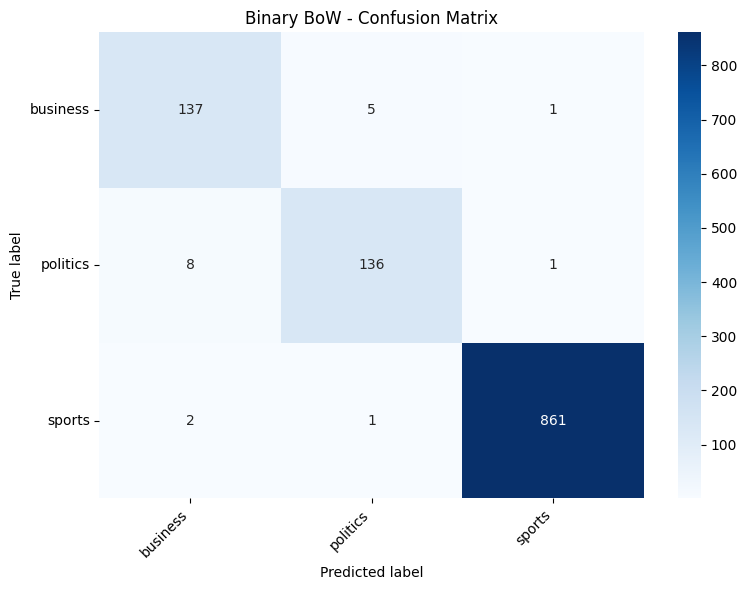

<Figure size 1200x500 with 0 Axes>

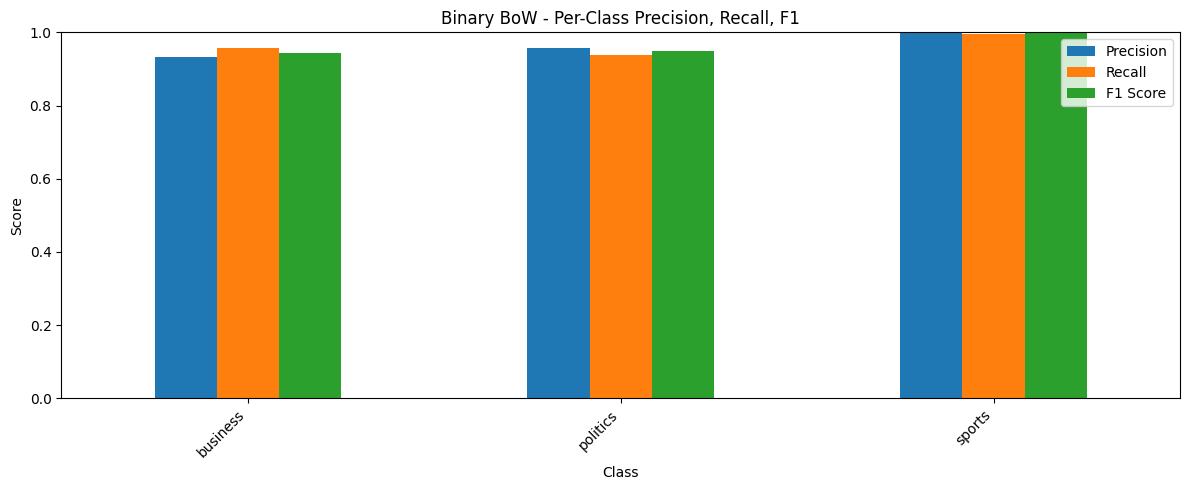


Top 15 words for class 'business':
  european
  plane
  business
  are
  consumer
  financial
  bank
  billion
  consumers
  companies
  flight
  industry
  mr
  market
  company

Top 15 words for class 'politics':
  those
  county
  ms
  military
  gov
  republicans
  senator
  officials
  house
  obama
  law
  washington
  state
  republican
  mr

Top 15 words for class 'sports':
  tournament
  cup
  coach
  stadium
  games
  club
  play
  season
  sports
  football
  game
  player
  team
  league
  players


In [6]:
# Plots for (a) binary-valued vector

# Confusion matrix
labels_unique = np.unique(y_test)
cm_bin = confusion_matrix(y_test, y_test_pred_bin, labels=labels_unique)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_bin,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_unique,
    yticklabels=labels_unique
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Binary BoW - Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Precision, Recall, F1 Barplot
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test, 
    y_test_pred_bin, 
    labels=labels_unique, 
    zero_division=0
)

df_metrics = pd.DataFrame({
    "Class": labels_unique,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
})

plt.figure(figsize=(12, 5))
df_metrics.set_index("Class").plot(kind="bar", figsize=(12, 5))
plt.ylim(0, 1)
plt.title("Binary BoW - Per-Class Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Top 15 Words Most Indicative of Each Class
feature_names = binary_vectorizer.get_feature_names_out()
coef = clf_bin.coef_

for idx, class_label in enumerate(clf_bin.classes_):
    top15 = np.argsort(coef[idx])[-15:]
    print(f"\nTop 15 words for class '{class_label}':")
    for i in top15:
        print(f"  {feature_names[i]}")


In [7]:
# (b) frequency vector
# TODO

# Count (term-frequency) bag-of-words representation
count_vectorizer = CountVectorizer(binary=False)
X_train_count = count_vectorizer.fit_transform(X_train)
X_val_count = count_vectorizer.transform(X_val)
X_test_count = count_vectorizer.transform(X_test)

# Logistic Regression classifier
clf_count = LogisticRegression(max_iter=1000, n_jobs=-1)
clf_count.fit(X_train_count, y_train)

# Evaluation on test set
y_test_pred_count = clf_count.predict(X_test_count)

acc_count = accuracy_score(y_test, y_test_pred_count)
macro_f1_count = f1_score(y_test, y_test_pred_count, average="macro")
micro_f1_count = f1_score(y_test, y_test_pred_count, average="micro")

print("Count BoW (frequency) - Test metrics")
print(f"Accuracy : {acc_count:.4f}")
print(f"Macro F1 : {macro_f1_count:.4f}")
print(f"Micro F1 : {micro_f1_count:.4f}")


Count BoW (frequency) - Test metrics
Accuracy : 0.9861
Macro F1 : 0.9667
Micro F1 : 0.9861


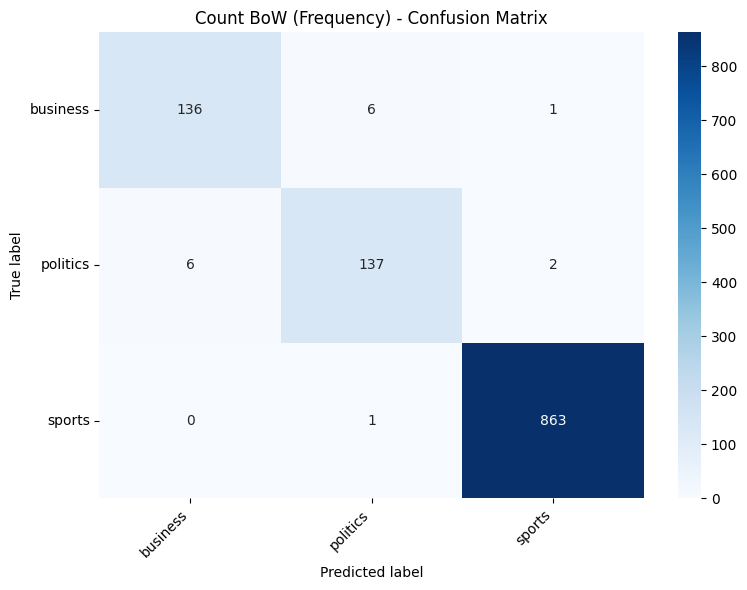

<Figure size 1200x500 with 0 Axes>

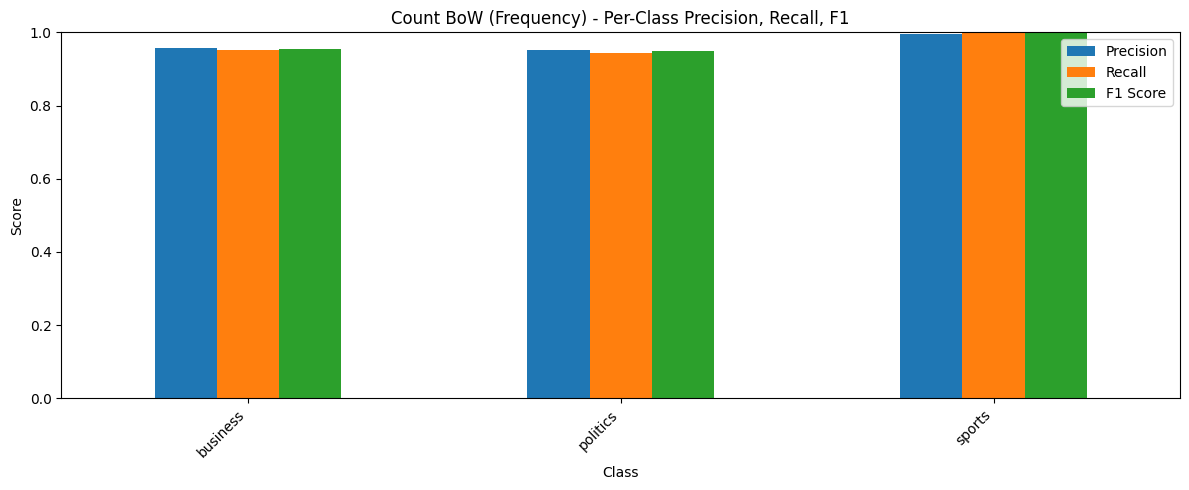


Top 15 words for class 'business' (Count BoW):
  summers
  plane
  consumers
  housing
  its
  bp
  percent
  union
  european
  mr
  oil
  fed
  flight
  market
  company

Top 15 words for class 'politics' (Count BoW):
  defense
  shooting
  county
  years
  justice
  republicans
  texas
  law
  officials
  guns
  military
  washington
  obama
  republican
  mr

Top 15 words for class 'sports' (Count BoW):
  cup
  sunday
  second
  stadium
  sports
  round
  player
  season
  open
  club
  football
  league
  game
  team
  players


In [8]:
# Plots for (b) frequency vector

# Confusion matrix
labels_unique = np.unique(y_test)
cm_count = confusion_matrix(y_test, y_test_pred_count, labels=labels_unique)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_count,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_unique,
    yticklabels=labels_unique
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Count BoW (Frequency) - Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Per-Class Precision, Recall, F1 Barplot
prec_c, rec_c, f1_c, _ = precision_recall_fscore_support(
    y_test,
    y_test_pred_count,
    labels=labels_unique,
    zero_division=0
)

df_metrics_count = pd.DataFrame({
    "Class": labels_unique,
    "Precision": prec_c,
    "Recall": rec_c,
    "F1 Score": f1_c
})

plt.figure(figsize=(12, 5))
df_metrics_count.set_index("Class").plot(kind="bar", figsize=(12, 5))
plt.ylim(0, 1)
plt.title("Count BoW (Frequency) - Per-Class Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Top 15 Words Most Indicative of Each Class
feature_names_count = count_vectorizer.get_feature_names_out()
coef_count = clf_count.coef_

for idx, class_label in enumerate(clf_count.classes_):
    top15 = np.argsort(coef_count[idx])[-15:]
    print(f"\nTop 15 words for class '{class_label}' (Count BoW):")
    for i in top15:
        print(f"  {feature_names_count[i]}")


In [9]:
# (c) tf-idf vector
# TODO

from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression classifier
clf_tfidf = LogisticRegression(max_iter=1000, n_jobs=-1)
clf_tfidf.fit(X_train_tfidf, y_train)

# Evaluation on test set
y_test_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

acc_tfidf = accuracy_score(y_test, y_test_pred_tfidf)
macro_f1_tfidf = f1_score(y_test, y_test_pred_tfidf, average="macro")
micro_f1_tfidf = f1_score(y_test, y_test_pred_tfidf, average="micro")

print("TF-IDF - Test metrics")
print(f"Accuracy : {acc_tfidf:.4f}")
print(f"Macro F1 : {macro_f1_tfidf:.4f}")
print(f"Micro F1 : {micro_f1_tfidf:.4f}")


TF-IDF - Test metrics
Accuracy : 0.9800
Macro F1 : 0.9557
Micro F1 : 0.9800


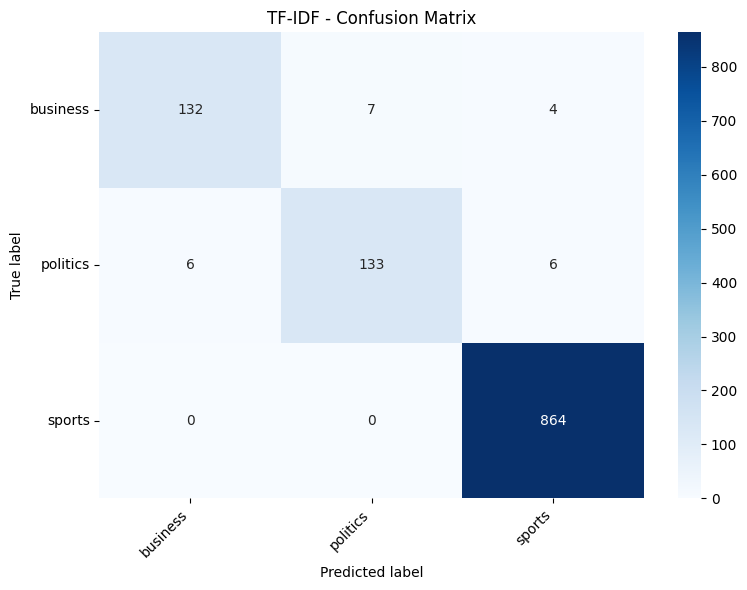

<Figure size 1200x500 with 0 Axes>

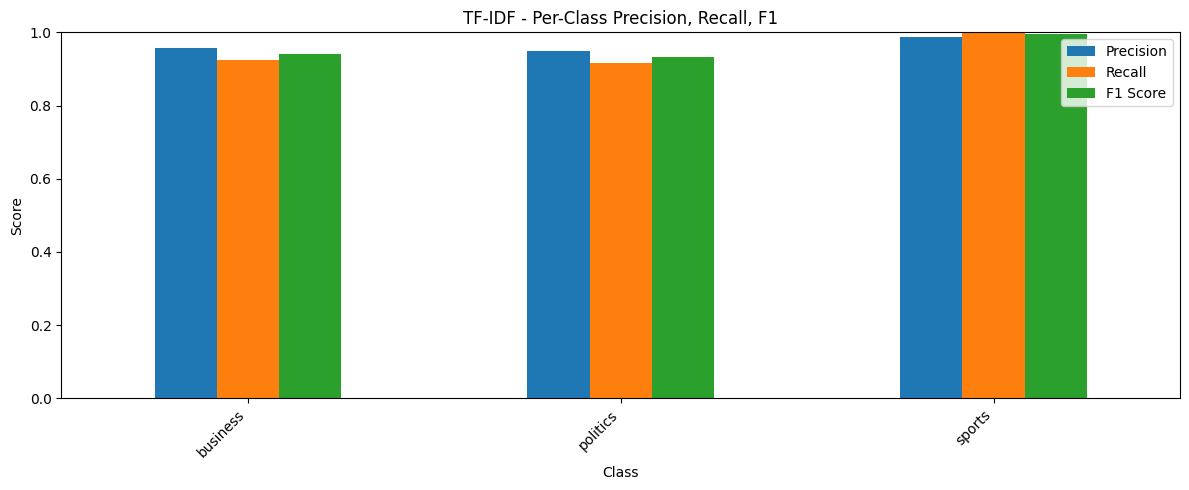


Top 15 words for class 'business' (TF-IDF):
  industry
  plane
  economic
  fed
  oil
  business
  bank
  china
  market
  flight
  companies
  european
  its
  percent
  company

Top 15 words for class 'politics' (TF-IDF):
  gun
  texas
  republicans
  senate
  said
  police
  officials
  federal
  military
  ms
  law
  republican
  obama
  state
  mr

Top 15 words for class 'sports' (TF-IDF):
  coach
  play
  games
  sports
  player
  cup
  club
  football
  season
  league
  he
  his
  team
  game
  players


In [10]:
# Plots for (c) tf-idf vector

# Confusion matrix
labels_unique = np.unique(y_test)
cm_tfidf = confusion_matrix(y_test, y_test_pred_tfidf, labels=labels_unique)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_tfidf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_unique,
    yticklabels=labels_unique
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("TF-IDF - Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Per-Class Precision, Recall, F1 Barplot
prec_t, rec_t, f1_t, _ = precision_recall_fscore_support(
    y_test,
    y_test_pred_tfidf,
    labels=labels_unique,
    zero_division=0
)

df_metrics_tfidf = pd.DataFrame({
    "Class": labels_unique,
    "Precision": prec_t,
    "Recall": rec_t,
    "F1 Score": f1_t
})

plt.figure(figsize=(12, 5))
df_metrics_tfidf.set_index("Class").plot(kind="bar", figsize=(12, 5))
plt.ylim(0, 1)
plt.title("TF-IDF - Per-Class Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Top 15 Words Most Indicative of Each Class
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()
coef_tfidf = clf_tfidf.coef_

for idx, class_label in enumerate(clf_tfidf.classes_):
    top15 = np.argsort(coef_tfidf[idx])[-15:]
    print(f"\nTop 15 words for class '{class_label}' (TF-IDF):")
    for i in top15:
        print(f"  {feature_names_tfidf[i]}")


Part 2: Word2Vec (20 points):

In [11]:
# TODO

import gensim.downloader as api
from gensim.models import Word2Vec

# GloVe 100d (pretrained) vs Word2Vec 100d (trained on NYT) – document vectors + Logistic Regression

# simple tokenizer
def tokenize(text):
    return text.lower().split()

# import Pretrained GloVe 100d
glove_model = api.load("glove-wiki-gigaword-100")  # 100-dimensional GloVe
glove_dim = glove_model.vector_size

def doc_to_glove_vector(text, model, dim):
    tokens = tokenize(text)
    vecs = [model[word] for word in tokens if word in model]
    
    if not vecs:
        return np.zeros(dim, dtype="float32")
    
    return np.mean(vecs, axis=0)

X_train_glove = np.vstack([doc_to_glove_vector(t, glove_model, glove_dim) for t in X_train])
X_val_glove = np.vstack([doc_to_glove_vector(t, glove_model, glove_dim) for t in X_val])
X_test_glove = np.vstack([doc_to_glove_vector(t, glove_model, glove_dim) for t in X_test])

clf_glove = LogisticRegression(max_iter=1000, n_jobs=-1)
clf_glove.fit(X_train_glove, y_train)
y_test_pred_glove = clf_glove.predict(X_test_glove)

acc_glove = accuracy_score(y_test, y_test_pred_glove)
macro_f1_glove = f1_score(y_test, y_test_pred_glove, average="macro")
micro_f1_glove = f1_score(y_test, y_test_pred_glove, average="micro")

print("GloVe 100d avg document vectors")
print(f"Accuracy: {acc_glove:.4f}")
print(f"Macro F1: {macro_f1_glove:.4f}")
print(f"Micro F1: {micro_f1_glove:.4f}")
print()




GloVe 100d avg document vectors
Accuracy: 0.9748
Macro F1: 0.9412
Micro F1: 0.9748



In [12]:
# (ii) Word2Vec 100d trained on NYT text data

# train Word2Vec on the whole NYT text corpus (unsupervised)
all_sentences = [tokenize(t) for t in df["text"].values]
w2v_dim = 100

w2v_model = Word2Vec(
    sentences=all_sentences,
    vector_size=w2v_dim,
    window=5,
    min_count=2,
    workers=4,
    sg=1,
    seed=42
)

def doc_to_w2v_vector(text, model, dim):
    tokens = tokenize(text)
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    
    if not vecs:
        return np.zeros(dim, dtype="float32")
    
    return np.mean(vecs, axis=0)

X_train_w2v = np.vstack([doc_to_w2v_vector(t, w2v_model, w2v_dim) for t in X_train])
X_val_w2v = np.vstack([doc_to_w2v_vector(t, w2v_model, w2v_dim) for t in X_val])
X_test_w2v = np.vstack([doc_to_w2v_vector(t, w2v_model, w2v_dim) for t in X_test])

clf_w2v = LogisticRegression(max_iter=1000, n_jobs=-1)
clf_w2v.fit(X_train_w2v, y_train)
y_test_pred_w2v = clf_w2v.predict(X_test_w2v)

acc_w2v = accuracy_score(y_test, y_test_pred_w2v)
macro_f1_w2v = f1_score(y_test, y_test_pred_w2v, average="macro")
micro_f1_w2v = f1_score(y_test, y_test_pred_w2v, average="micro")

print("Word2Vec 100d avg document vectors (trained on NYT dataset)")
print(f"Accuracy: {acc_w2v:.4f}")
print(f"Macro F1: {macro_f1_w2v:.4f}")
print(f"Micro F1: {micro_f1_w2v:.4f}")


Word2Vec 100d avg document vectors (trained on NYT dataset)
Accuracy: 0.9670
Macro F1: 0.9226
Micro F1: 0.9670


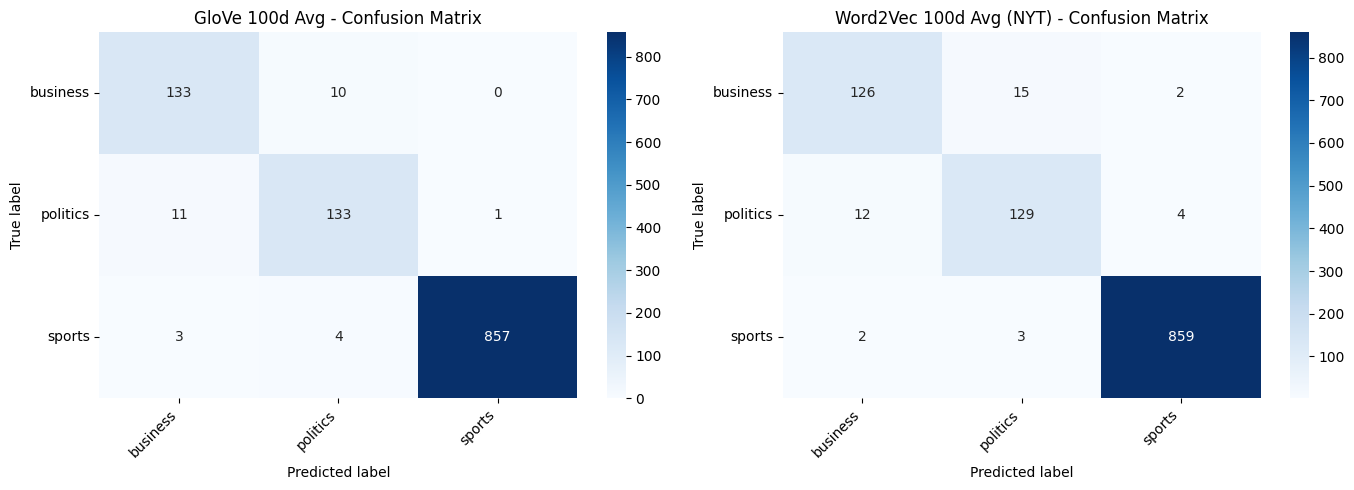

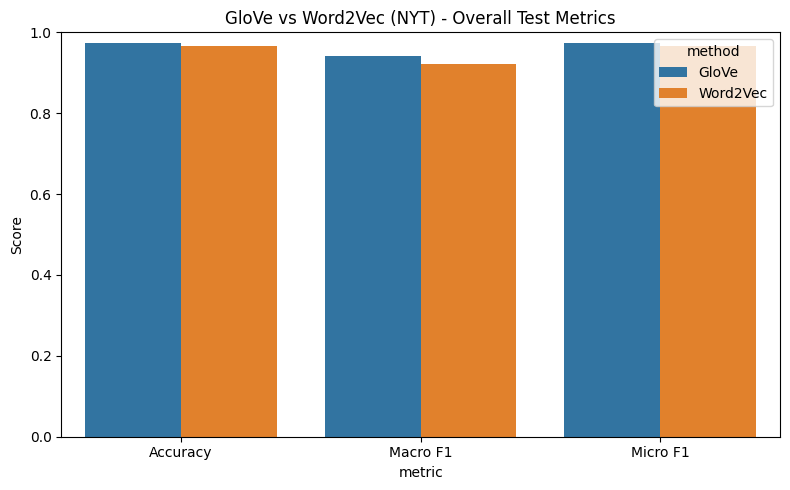

<Figure size 1200x500 with 0 Axes>

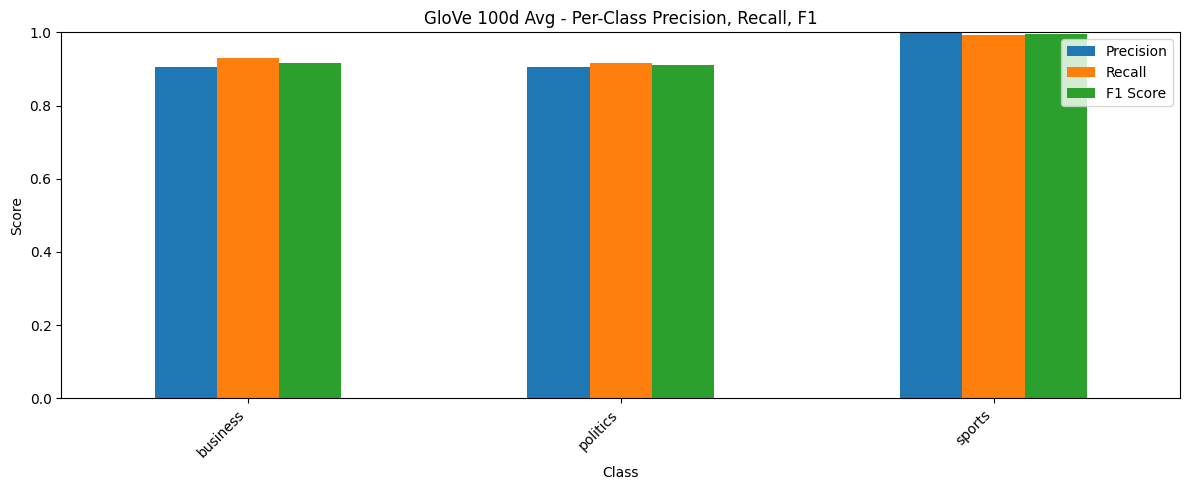

<Figure size 1200x500 with 0 Axes>

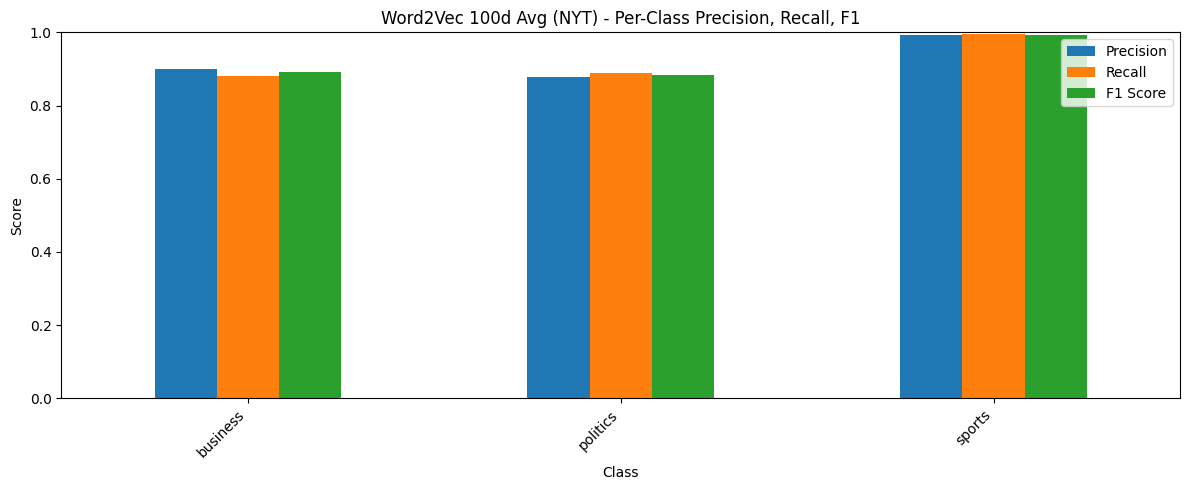

In [13]:
# Visualization: comparison between GloVe and NYT-trained Word2Vec

labels_unique = np.unique(y_test)

# Confusion matrices
cm_glove = confusion_matrix(y_test, y_test_pred_glove, labels=labels_unique)
cm_w2v = confusion_matrix(y_test, y_test_pred_w2v, labels=labels_unique)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(
    cm_glove,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_unique,
    yticklabels=labels_unique
)
plt.title("GloVe 100d Avg - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.subplot(1, 2, 2)
sns.heatmap(
    cm_w2v,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_unique,
    yticklabels=labels_unique
)
plt.title("Word2Vec 100d Avg (NYT) - Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


# GloVe vs Word2Vec - Metrics Comparison

# Overall metrics 
metrics_df = pd.DataFrame({
    "method": ["GloVe", "GloVe", "GloVe", "Word2Vec", "Word2Vec", "Word2Vec"],
    "metric": ["Accuracy", "Macro F1", "Micro F1"] * 2,
    "score": [
        acc_glove, macro_f1_glove, micro_f1_glove,
        acc_w2v,  macro_f1_w2v,   micro_f1_w2v
    ]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x="metric", y="score", hue="method")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("GloVe vs Word2Vec (NYT) - Overall Test Metrics")
plt.tight_layout()
plt.show()


# Per-Class Precision, Recall, F1 for both methods
prec_g, rec_g, f1_g, _ = precision_recall_fscore_support(
    y_test, y_test_pred_glove, labels=labels_unique, zero_division=0
)
prec_w, rec_w, f1_w, _ = precision_recall_fscore_support(
    y_test, y_test_pred_w2v, labels=labels_unique, zero_division=0
)

df_glove_prf = pd.DataFrame({
    "Class": labels_unique,
    "Precision": prec_g,
    "Recall": rec_g,
    "F1 Score": f1_g
})
df_w2v_prf = pd.DataFrame({
    "Class": labels_unique,
    "Precision": prec_w,
    "Recall": rec_w,
    "F1 Score": f1_w
})

plt.figure(figsize=(12, 5))
df_glove_prf.set_index("Class").plot(kind="bar", figsize=(12, 5))
plt.ylim(0, 1)
plt.title("GloVe 100d Avg - Per-Class Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
df_w2v_prf.set_index("Class").plot(kind="bar", figsize=(12, 5))
plt.ylim(0, 1)
plt.title("Word2Vec 100d Avg (NYT) - Per-Class Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Part 3: BERT (20 points):

In [14]:
# BERT (bert-base-uncased) 

import os
import pickle

import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import (
    BertTokenizer,
    BertForSequenceClassification,
    get_linear_schedule_with_warmup,
    logging as hf_logging,
)
from tqdm.auto import tqdm


# Reduce Hugging Face logging noise 
hf_logging.set_verbosity_error()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


# Hyperparameters and paths
max_len = 64
batch_size = 16
save_dir = "bert_nyt_checkpoint"


# Dataset with DataLoader helpers
class NYTDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = list(texts)
        self.labels = list(labels)
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt",
        )

        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item["labels"] = torch.tensor(label, dtype=torch.long)
        return item


def build_loaders(tokenizer, y_train_enc, y_val_enc, y_test_enc):
    train_dataset = NYTDataset(X_train, y_train_enc, tokenizer, max_len)
    val_dataset = NYTDataset(X_val, y_val_enc, tokenizer, max_len)
    test_dataset = NYTDataset(X_test, y_test_enc, tokenizer, max_len)

    pin_memory = torch.cuda.is_available()
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=pin_memory)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=pin_memory)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=pin_memory)

    return train_loader, val_loader, test_loader


def evaluate(loader):
    model.eval()
    all_labels = []
    all_preds = []
    total_loss = 0.0

    with torch.no_grad():
        for batch in loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(
                input_ids = input_ids,
                attention_mask = attention_mask,
                labels = labels,
            )
            loss = outputs.loss
            logits = outputs.logits

            total_loss += loss.item() * input_ids.size(0)

            preds = torch.argmax(logits, dim=1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    avg_loss = total_loss / len(loader.dataset)
    acc = accuracy_score(all_labels, all_preds)
    macro = f1_score(all_labels, all_preds, average="macro")
    micro = f1_score(all_labels, all_preds, average="micro")

    return avg_loss, acc, macro, micro, all_labels, all_preds



# load existing checkpoint or train from scratch then save
model_file_exists = any(
    os.path.exists(os.path.join(save_dir, fname))
    for fname in ["model.safetensors", "pytorch_model.bin"]
)

checkpoint_exists = (
    model_file_exists
    and os.path.exists(os.path.join(save_dir, "config.json"))
    and os.path.exists(os.path.join(save_dir, "label_encoder.pkl"))
)

print("Checkpoint exists:", checkpoint_exists)

if checkpoint_exists:
    # Load existing fine-tuned model 
    print(f"Found existing checkpoint in '{save_dir}'. Loading without retraining...")

    # load label encoder and tokenizer
    with open(os.path.join(save_dir, "label_encoder.pkl"), "rb") as f:
        label_encoder = pickle.load(f)

    tokenizer = BertTokenizer.from_pretrained(save_dir)

    # encode labels with loaded encoder
    y_train_enc = label_encoder.transform(y_train)
    y_val_enc = label_encoder.transform(y_val)
    y_test_enc = label_encoder.transform(y_test)

    # build loaders
    train_loader, val_loader, test_loader = build_loaders(tokenizer, y_train_enc, y_val_enc, y_test_enc)

    # load model
    model = BertForSequenceClassification.from_pretrained(save_dir)
    model.to(device)

    # evaluate on test only
    test_loss, test_acc_bert, macro_f1_bert, micro_f1_bert, test_true_enc, test_pred_enc = evaluate(test_loader)

else:
    # Train new model from bert-base-uncased 
    print(f"No checkpoint found in '{save_dir}'. Training a new model...")

    # label encoder based on current df labels
    label_encoder = LabelEncoder()
    label_encoder.fit(df["label"].values)

    y_train_enc = label_encoder.transform(y_train)
    y_val_enc = label_encoder.transform(y_val)
    y_test_enc = label_encoder.transform(y_test)

    # tokenizer from base BERT
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

    # build loaders
    train_loader, val_loader, test_loader = build_loaders(tokenizer, y_train_enc, y_val_enc, y_test_enc)

    num_labels = len(label_encoder.classes_)

    model = BertForSequenceClassification.from_pretrained(
        "bert-base-uncased",
        num_labels=num_labels,
    )
    model.to(device)

    optimizer = AdamW(model.parameters(), lr=2e-5)
    epochs = 3
    total_steps = len(train_loader) * epochs

    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps,
    )

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

        for batch in progress_bar:
            optimizer.zero_grad()

            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels,
            )
            loss = outputs.loss
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()

            train_loss += loss.item() * input_ids.size(0)
            progress_bar.set_postfix({"loss": loss.item()})

        avg_train_loss = train_loss / len(train_loader.dataset)
        val_loss, val_acc, val_macro, val_micro, _, _ = evaluate(val_loader)
        print(f"Epoch {epoch+1}:")
        print(f"Train loss: {avg_train_loss:.4f}")
        print(f"Val loss: {val_loss:.4f}")
        print(f"Val Acc: {val_acc:.4f}, Macro F1: {val_macro:.4f}, Micro F1: {val_micro:.4f}")

    # final test evaluation
    test_loss, test_acc_bert, macro_f1_bert, micro_f1_bert, test_true_enc, test_pred_enc = evaluate(test_loader)

    # save checkpoint so next run will load instead of retrain
    os.makedirs(save_dir, exist_ok=True)

    print("Saving BERT model...")
    model.save_pretrained(save_dir)
    tokenizer.save_pretrained(save_dir)

    with open(os.path.join(save_dir, "label_encoder.pkl"), "wb") as f:
        pickle.dump(label_encoder, f)

    print("Saved files:", os.listdir(save_dir))



Using device: cuda
Checkpoint exists: False
No checkpoint found in 'bert_nyt_checkpoint'. Training a new model...


Epoch 1/3:   0%|          | 0/576 [00:00<?, ?it/s]

Epoch 1:
Train loss: 0.1326
Val loss: 0.0700
Val Acc: 0.9774, Macro F1: 0.9500, Micro F1: 0.9774


Epoch 2/3:   0%|          | 0/576 [00:00<?, ?it/s]

Epoch 2:
Train loss: 0.0424
Val loss: 0.0822
Val Acc: 0.9783, Macro F1: 0.9544, Micro F1: 0.9783


Epoch 3/3:   0%|          | 0/576 [00:00<?, ?it/s]

Epoch 3:
Train loss: 0.0134
Val loss: 0.0860
Val Acc: 0.9818, Macro F1: 0.9597, Micro F1: 0.9818
Saving BERT model...
Saved files: ['config.json', 'label_encoder.pkl', 'model.safetensors', 'special_tokens_map.json', 'tokenizer_config.json', 'vocab.txt']


In [15]:
print("BERT (bert-base-uncased) - Test metrics")
print(f"Test loss: {test_loss:.4f}")
print(f"Accuracy: {test_acc_bert:.4f}")
print(f"Macro F1: {macro_f1_bert:.4f}")
print(f"Micro F1: {micro_f1_bert:.4f}")

BERT (bert-base-uncased) - Test metrics
Test loss: 0.0969
Accuracy: 0.9818
Macro F1: 0.9621
Micro F1: 0.9818


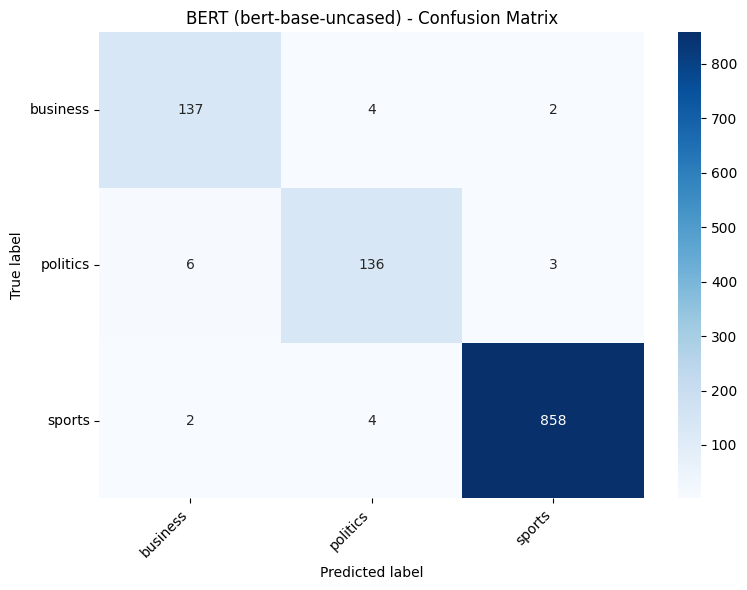

<Figure size 1200x500 with 0 Axes>

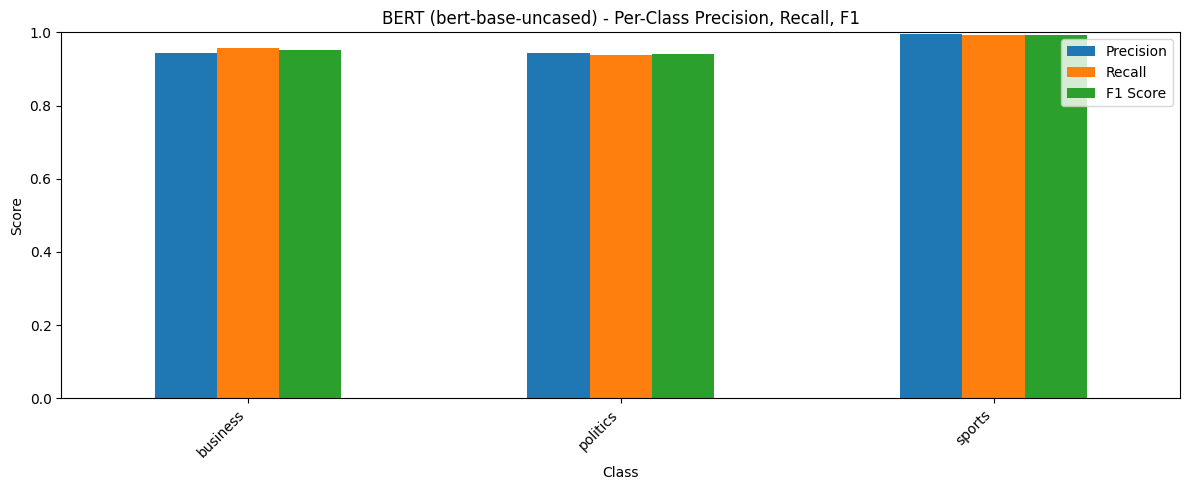

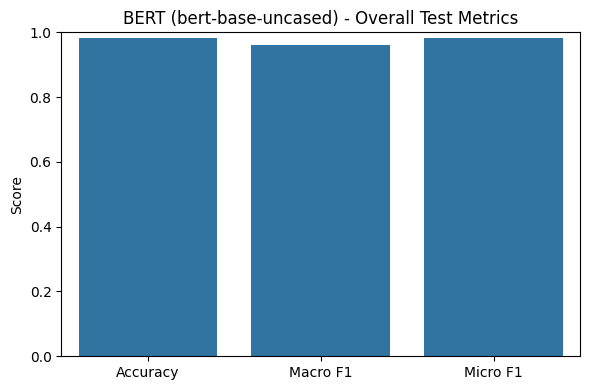

In [16]:
# Visualization for BERT fine-tuned classifier

# decoded labels for plotting
bert_test_true_labels = label_encoder.inverse_transform(test_true_enc)
bert_test_pred_labels = label_encoder.inverse_transform(test_pred_enc)

labels_unique = np.unique(bert_test_true_labels)
cm_bert = confusion_matrix(bert_test_true_labels, bert_test_pred_labels, labels=labels_unique)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_bert,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=labels_unique,
    yticklabels=labels_unique,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("BERT (bert-base-uncased) - Confusion Matrix")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




# Per-class Precision, Recall, F1 (using encoded labels)
prec_b, rec_b, f1_b, _ = precision_recall_fscore_support(
    bert_test_true_labels,
    bert_test_pred_labels,
    labels=labels_unique,
    zero_division=0
)

df_metrics_bert = pd.DataFrame({
    "Class": labels_unique,
    "Precision": prec_b,
    "Recall": rec_b,
    "F1 Score": f1_b
})

plt.figure(figsize=(12, 5))
df_metrics_bert.set_index("Class").plot(kind="bar", figsize=(12, 5))
plt.ylim(0, 1)
plt.title("BERT (bert-base-uncased) - Per-Class Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Overall metrics summary for reference (optional)
metrics_bert = {
    "Accuracy": test_acc_bert,
    "Macro F1": macro_f1_bert,
    "Micro F1": micro_f1_bert,
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics_bert.keys()), y=list(metrics_bert.values()))
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("BERT (bert-base-uncased) - Overall Test Metrics")
plt.tight_layout()
plt.show()


Part 4: Summary of results / Reflection

### Overall Performance Comparison

| Model / Representation  | Accuracy   | Macro F1   | Micro F1   |
| ----------------------- | ---------- | ---------- | ---------- |
| **Binary BoW**          | **0.9844** | **0.9632** | **0.9844** |
| **Count BoW**      | **0.9861** | **0.9667** | **0.9861** |
| **TF-IDF**              | 0.9800     | 0.9557     | 0.9800     |
| **GloVe 100d (avg)**    | 0.9748     | 0.9412     | 0.9748     |
| **Word2Vec 100d (NYT)** | 0.9670     | 0.9226     | 0.9670     |
| **BERT (fine-tuned)**   | 0.9818     | 0.9621     | 0.9818     |


### Summary & Interpretation

1. Classical Bag-of-Words methods performed surprisingly well, with both Binary BoW and Count BoW achieving the highest accuracy and F1 scores across all models.

   * Count BoW was the single best performer (Accuracy = 0.9861, Macro F1 = 0.9667).
   * This indicates that for this dataset, simple word-presence or frequency patterns are already highly discriminative.

2. TF-IDF underperformed compared to both BoW variants, despite being expected to help emphasize important terms.

   * The drop in Macro F1 (0.9557) suggests TF-IDF may have overly down-weighted some useful discriminative words.

3. GloVe and Word2Vec performed worse than all BoW methods.

   * Averaging word embeddings collapses word order and semantic nuance into a single dense vector, which may lose task-specific signals.
   * Word2Vec trained on NYT performed slightly worse than pretrained GloVe, likely due to a smaller training corpus and limited embedding quality.

4. BERT improved over the embedding-based models but did not outperform Count or Binary BoW.

   * Accuracy = 0.9818, Macro F1 = 0.9621
   * BERT typically excels on large and varied datasets, since NYT articles are long, well-structured, and topic-specific, the simpler representations capture the key signals well.
   * The gains from contextual embeddings were not as dramatic because the dataset is not extremely ambiguous or noisy.


### Reflection

* The NYT dataset favors lexical cues over deep semantic representation.
  Words associated with each news category are very distinctive (e.g., “goal”, “president”, “stock”, “court”), which makes simple term-frequency methods extremely effective.

* Embedding-based models suffered from information compression, especially when averaging embeddings, which removes positional information and reduces expressive power.

* BERT performed strongly, but its advantage is not large enough to justify the computational cost for this dataset. Classical models provided better or equal accuracy with a fraction of the compute time.

* Best overall model: Count BoW + Logistic Regression
  It delivered the highest accuracy (0.9861) with minimal complexity.

### Why BoW Outperformed BERT on This Dataset

Although BERT is generally far more expressive than classical models, the NYT dataset allows Bag-of-Words methods to excel because the categories are strongly tied to distinctive, high-frequency lexical cues. NYT articles tend to be long, information-dense, and topic-specific, meaning that simple frequency patterns (e.g., “goal”, “match”, “coach” for sports; “court”, “judge”, “law” for legal topics) are often sufficient to distinguish classes. In contrast, the averaged nature of BERT’s 64-token truncation removes much of the article structure and contextual information that BERT normally leverages. As a result, BERT’s contextual embeddings provide less added value, while BoW captures the dataset’s discriminative signals more directly and with far lower computational cost.

---


### Analysis of Confusion Matrices Across All Models

The confusion matrices reveal clear patterns in how each model handles the three NYT categories: **business**, **politics**, and **sports**. Across all representations, **sports** is consistently the easiest class to classify, while **business** and **politics** show more overlap and account for the majority of misclassifications.


#### 1. BoW Models (Binary, Count, TF-IDF)

The BoW models (Binary and Count in particular) demonstrate highly accurate and stable predictions:

* **Binary BoW** and **Count BoW** correctly classify nearly all samples, with only a handful of errors between *business* and *politics*.
* Misclassifications are rare for *sports*, only ~1-3 instances per model.
* The most common errors occur when:

  * A **business** article is predicted as **politics**, or
  * A **politics** article is predicted as **business**.

This makes sense because political and business articles share overlapping vocabulary (e.g., *policy*, *budget*, *trade*, *market*, *government*).
Count BoW performed slightly better than Binary BoW by capturing term frequency, reducing a few borderline errors.

**TF-IDF**, while still strong, underperformed slightly:

* It made more mistakes in both business & politics and politics & business directions.
* The weighting scheme may have down-weighted important high-frequency topical terms.



#### 2. Embedding-Based Models (GloVe and Word2Vec)

Both embedding-based models show a clear drop in accuracy compared to BoW:

* **GloVe** and **Word2Vec** confuse business & politics more heavily than BoW models.
* *Sports* remains easy, but errors increase (3–4 mistakes per class).
* Semantic averaging loses structural and contextual information, causing categories with overlapping topics to drift closer in embedding space.

Notable patterns:

* Business articles can drift toward politics if they discuss government regulations or markets.
* Politics articles can drift toward business if they involve budgets, trade, or financial decisions.
* Sports retains its uniqueness due to distinctive terms (names, match verbs, scoring language).

Overall, embeddings compress meaning too aggressively for this dataset, and classification suffers.



#### 3. BERT (Fine-Tuned)

BERT performs better than GloVe/Word2Vec but still does not surpass BoW:

* Most predictions are correct, but small errors occur in both directions between **business** and **politics**.
* A few *sports* samples are misclassified when contextual tokens resemble political or business discussions (e.g., sports economics, contracts, ownership disputes).
* The 64-token truncation limit removes much of the valuable article content BERT would normally use.

Although BERT understands context more deeply, in this dataset:

* **keywords matter more than context**,
* **articles are long**, and
* **truncation removes signal**.

Thus, BERT does not gain the advantage it typically has.



### Overall Interpretation

Across all confusion matrices, several trends emerge:

1. **Sports is the easiest class**: nearly all models classify it correctly because the vocabulary is distinct.
2. **Business vs. Politics is the main challenge**: these two categories frequently overlap in terminology and themes.
3. **Simpler models outperform more complex ones**: BoW retains the raw lexical signals that best discriminate topics.
4. **Embedding models and BERT blur distinctions**: dense representations compress documents into lower-dimensional space, losing category-specific vocabulary cues.
